# Title and description wordclouds

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import string
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df_d=pd.read_json('bizbuysell.detail.lines.json',lines=True)

In [5]:
df_l=pd.read_json('bizbuysell.list.lines.json',lines=True)

# Get all business id, title, and description data by order of confidence

In [6]:
dfa=df_d[['s_id','s_name','s_desc']]
dfa.columns=['id','title','desc']

dfb=df_d[['s_id','s_b_name','s_b_desc']]
dfb.columns=['id','title','desc']

dfc=df_d[['s_id','p_title','p_desc']]
dfc.columns=['id','title','desc']

dfd=df_l[['s_id','s_name','s_desc']]
dfd.columns=['id','title','desc']

dfe=df_l[['id','title','desc']]
dfe.columns=['id','title','desc']

# Combine, drop missing data, and keep first unique instance by id

In [7]:
df=pd.concat([dfa,dfb,dfc,dfe])

In [8]:
df.shape

(379305, 3)

In [9]:
df=df.dropna()
df=df.drop_duplicates(subset='id',keep='first')

In [10]:
df.shape

(39066, 3)

# Get rid of franchises and leases

In [11]:
df=df[(~df.title.str.contains(r"[Ff]ranchise"))&(~df.title.str.contains(r"[Ll]ease"))]

In [12]:
df.shape

(36470, 3)

In [13]:
df.head()

,id,title,desc
0,2067319.0,Popular Marina in Central New Jersey in Middle...,It is fully owned by a man and his wife since ...
1,1990890.0,"High Exposure in Mays Landing, New Jersey - Bi...",AMAZING OPPORTUNITY! Priced to sell and ready ...
2,2050006.0,"Rental Units with Real Estate in Randolph, New...",This is a 6 unit Airbnb with an average occupa...
3,2039720.0,"Duplex, Short term or Long term in Pinellas Co...",Rare Largo/Seminole area duplex centrally loca...
4,1576680.0,"Major Price Reduction Rest/Tavern/ 13,000sq. f...",Price reduced to $850. 000 MAKE AN OFFER!!!!!!...


# Titles

In [14]:
stopwords= set(list(STOPWORDS)+['bizbuysell','&', ',','.','_','-']) 

In [15]:
def cleanup_text(t):
    result=[]
    for c in str(t).lower():
        if c in string.printable:
            result.append(c)
    
    return list(''.join(result).split())

In [16]:
df_t=df[['title']]
df_t['title_l']=df_t['title'].apply(cleanup_text)
df_t=df_t.explode(column='title_l')
df_t['stopword']=df_t['title_l'].apply(lambda x: x in stopwords)
df_t=df_t[df_t.stopword==False]

In [17]:
counts=df_t.groupby('title_l')['title'].count().to_dict()

In [18]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=1000,
                relative_scaling=0.21,
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(counts)

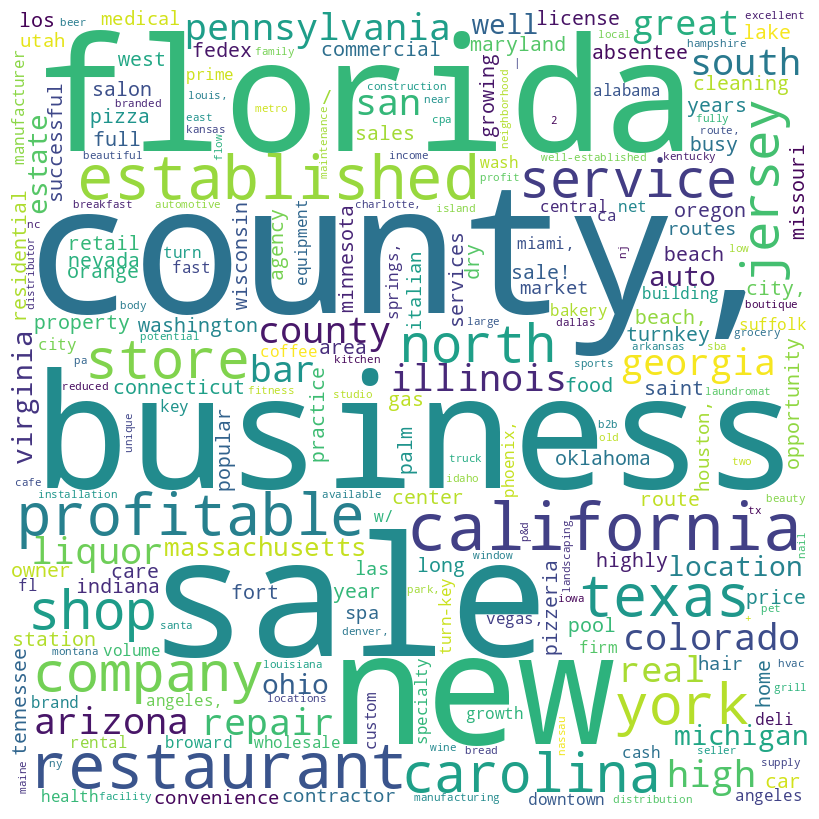

In [19]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# Descriptions

In [20]:
stopwords= set(list(STOPWORDS)+['bizbuysell','&', ',','.','_','-']) 

In [21]:
def cleanup_text(t):
    result=[]
    for c in str(t).lower():
        if c in string.printable:
            result.append(c)
    
    return list(''.join(result).split())

In [22]:
df_p=df[['desc']]
df_p['desc_l']=df_p['desc'].apply(cleanup_text)
df_p=df_p.explode(column='desc_l')
df_p['stopword']=df_p['desc_l'].apply(lambda x: x in stopwords)
df_p=df_p[df_p.stopword==False]

In [23]:
counts=df_p.groupby('desc_l')['desc'].count().to_dict()

In [24]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=1000,
                relative_scaling=0.21,
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(counts)

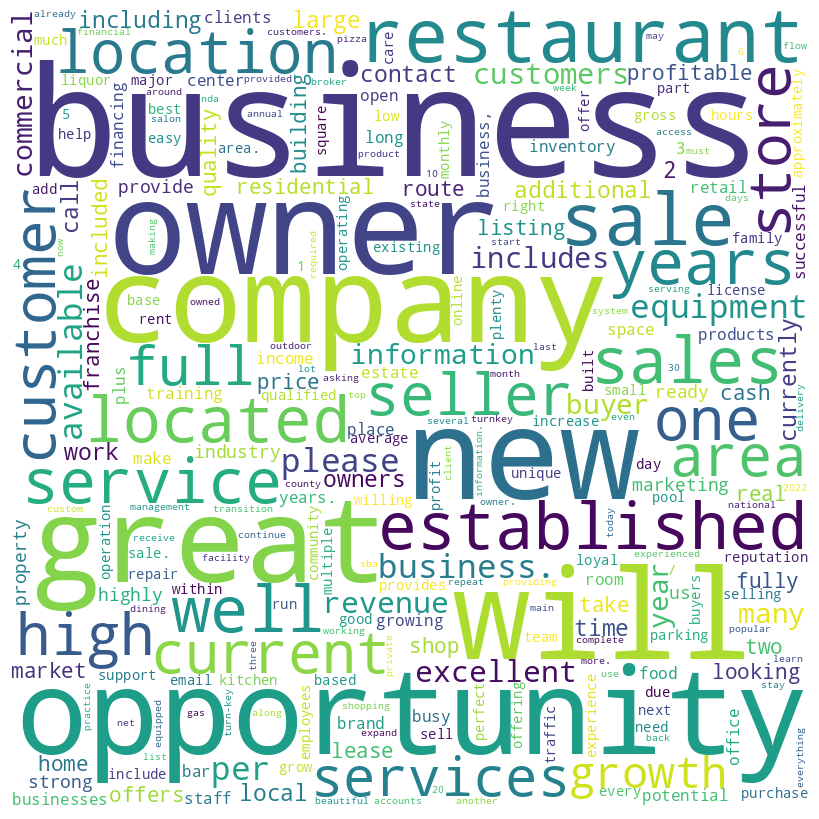

In [25]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()